In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")
%matplotlib inline


In [2]:
df = pd.read_csv("dataset/Traffic.csv")  

In [3]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [4]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.info()


Shape: (2976, 9)

Columns:
 Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='str')
<class 'pandas.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Time               2976 non-null   str  
 1   Date               2976 non-null   int64
 2   Day of the week    2976 non-null   str  
 3   CarCount           2976 non-null   int64
 4   BikeCount          2976 non-null   int64
 5   BusCount           2976 non-null   int64
 6   TruckCount         2976 non-null   int64
 7   Total              2976 non-null   int64
 8   Traffic Situation  2976 non-null   str  
dtypes: int64(6), str(3)
memory usage: 209.4 KB


In [5]:
df.isnull().sum()


Time                 0
Date                 0
Day of the week      0
CarCount             0
BikeCount            0
BusCount             0
TruckCount           0
Total                0
Traffic Situation    0
dtype: int64

In [6]:
df['TimeObj'] = pd.to_datetime(df['Time'], format='%I:%M:%S %p')

df['Hour'] = df['TimeObj'].dt.hour
df['Minute'] = df['TimeObj'].dt.minute

df['DayNum'] = df['Date']   # keep numeric only


In [9]:
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,TimeObj,Hour,Minute,DayNum
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low,1900-01-01 00:00:00,0,0,10
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low,1900-01-01 00:15:00,0,15,10
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low,1900-01-01 00:30:00,0,30,10
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low,1900-01-01 00:45:00,0,45,10
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal,1900-01-01 01:00:00,1,0,10


In [10]:
df.describe()


,Date,CarCount,BikeCount,BusCount,TruckCount,Total,TimeObj,Hour,Minute,DayNum
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976,2976.00000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414,1900-01-01 11:52:30,11.50000,22.500000,16.000000
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000,1900-01-01 00:00:00,0.00000,0.000000,1.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000,1900-01-01 05:56:15,5.75000,11.250000,8.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000,1900-01-01 11:52:30,11.50000,22.500000,16.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000,1900-01-01 17:48:45,17.25000,33.750000,24.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000,1900-01-01 23:45:00,23.00000,45.000000,31.000000
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627,NaN,6.92335,16.773328,8.945775


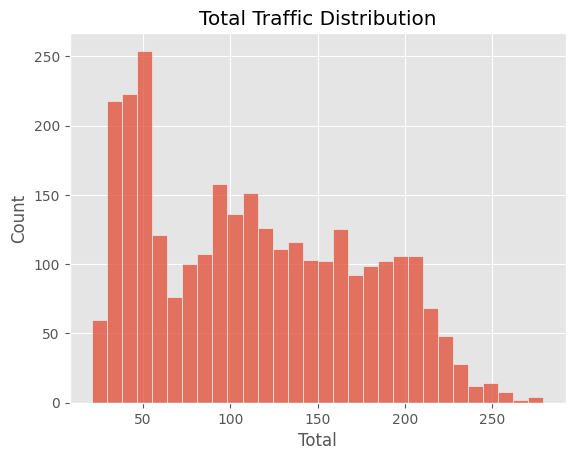

In [11]:
sns.histplot(df['Total'], bins=30)
plt.title("Total Traffic Distribution")
plt.show()


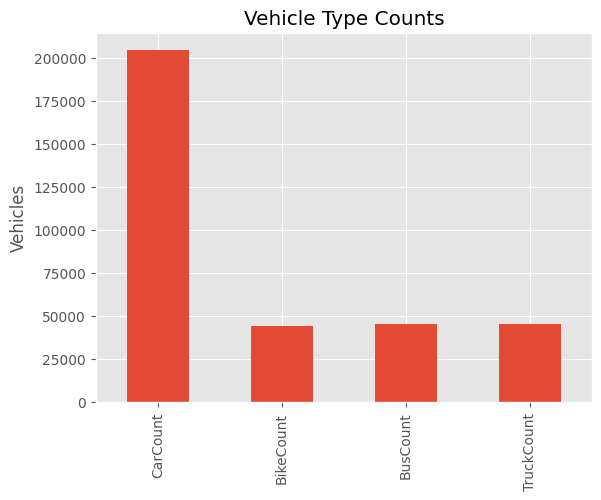

In [12]:
vehicle_cols = ['CarCount','BikeCount','BusCount','TruckCount']

df[vehicle_cols].sum().plot(kind='bar')
plt.title("Vehicle Type Counts")
plt.ylabel("Vehicles")
plt.show()


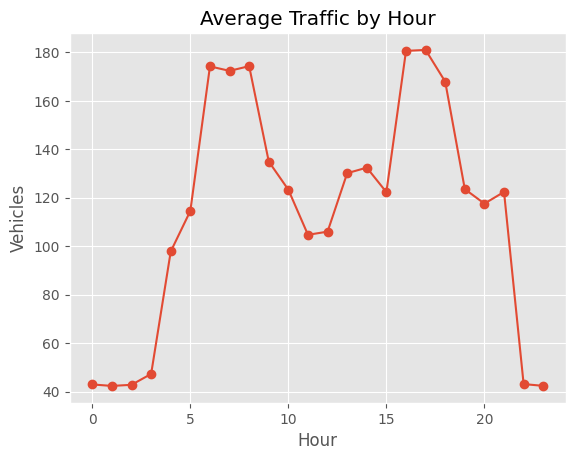

In [13]:
df.groupby('Hour')['Total'].mean().plot(marker='o')
plt.title("Average Traffic by Hour")
plt.ylabel("Vehicles")
plt.show()


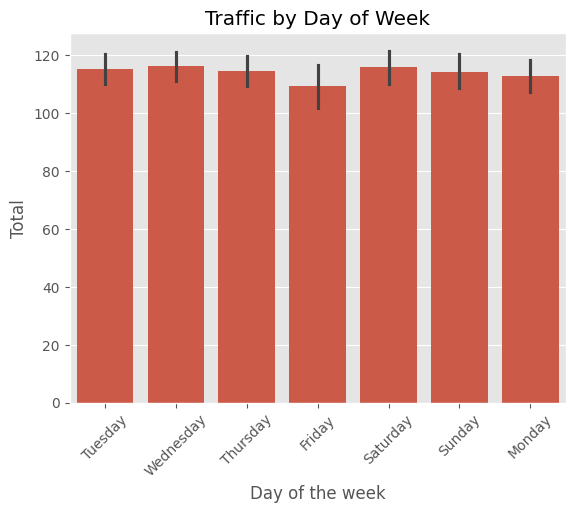

In [14]:
sns.barplot(x='Day of the week', y='Total', data=df, estimator=np.mean)
plt.xticks(rotation=45)
plt.title("Traffic by Day of Week")
plt.show()


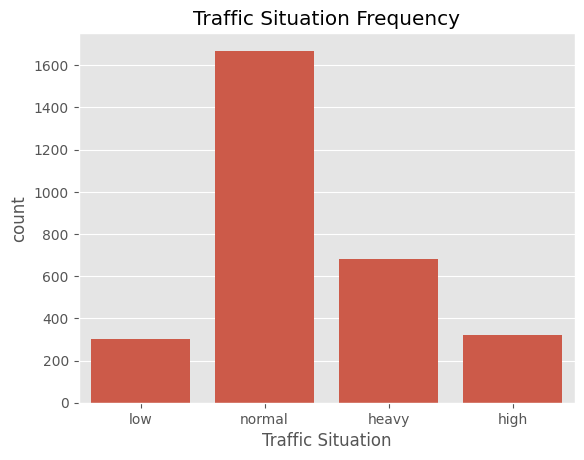

In [15]:
sns.countplot(x='Traffic Situation', data=df)
plt.title("Traffic Situation Frequency")
plt.show()


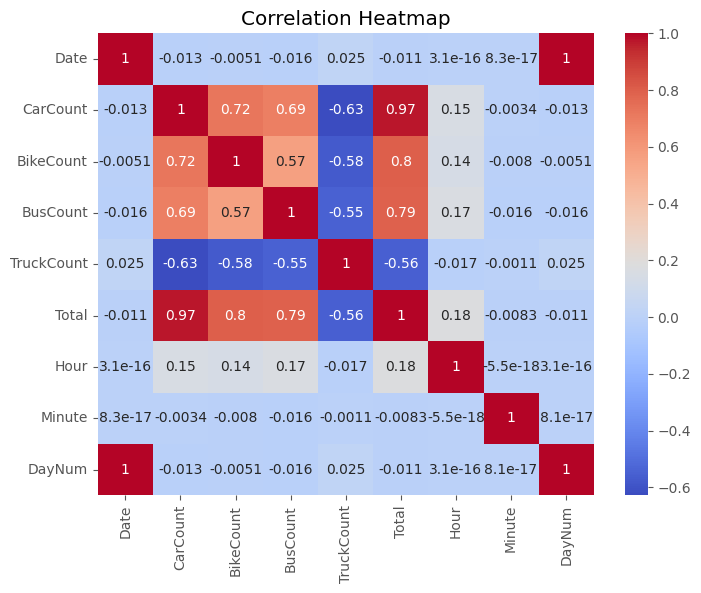

In [16]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [27]:
# ratios = np.random.dirichlet([6,2,1.5,1], size=len(df))


# lanes = (ratios * df['Total'].values.reshape(-1,1)).astype(int)

# df['Lane_A'] = lanes[:,0]
# df['Lane_B'] = lanes[:,1]
# df['Lane_C'] = lanes[:,2]

# # last lane gets remainder (guarantees exact sum)
# df['Lane_D'] = df['Total'] - (df['Lane_A'] + df['Lane_B'] + df['Lane_C'])

# df[['Total','Lane_A','Lane_B','Lane_C','Lane_D']].head()


lane_data = []

for total, hour in zip(df['Total'], df['Hour']):
    
    if 7 <= hour <= 10:          # morning rush
        alpha = [7,2,1,1]       # Lane A heavy
        
    elif 17 <= hour <= 20:      # evening rush
        alpha = [1,1,7,2]       # Lane C heavy
        
    else:                       # normal time
        alpha = [2,2,2,2]       # balanced
    
    r = np.random.dirichlet(alpha)
    split = (r * total).astype(int)
    split[3] = total - split[:3].sum()
    
    lane_data.append(split)

lane_data = np.array(lane_data)

df[['Lane_A','Lane_B','Lane_C','Lane_D']] = lane_data


In [28]:
print("Difference:",
      (df['Lane_A'] + df['Lane_B'] + df['Lane_C'] + df['Lane_D'] - df['Total']).abs().sum())


Difference: 0


In [29]:
lane_cols = ['Lane_A','Lane_B','Lane_C','Lane_D']

df[lane_cols].describe()


,Lane_A,Lane_B,Lane_C,Lane_D
count,2976.000000,2976.000000,2976.000000,2976.000000
mean,33.631720,22.595094,33.878360,24.113239
std,37.524322,20.710044,35.907818,20.207419
min,0.000000,0.000000,0.000000,1.000000
25%,8.000000,8.000000,9.000000,10.000000
50%,19.000000,16.000000,20.000000,18.000000
75%,44.000000,31.000000,46.000000,33.000000
max,206.000000,134.000000,198.000000,151.000000


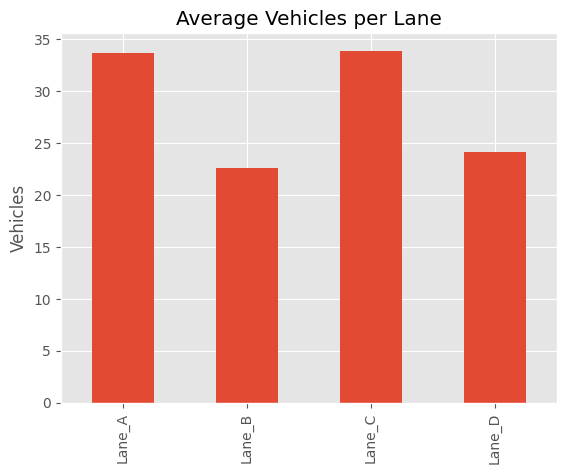

In [30]:
df[lane_cols].mean().plot(kind='bar')
plt.title("Average Vehicles per Lane")
plt.ylabel("Vehicles")
plt.show()


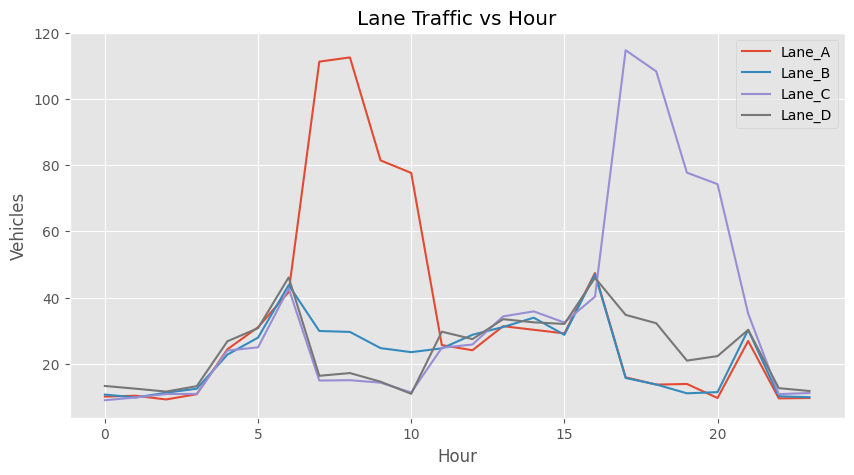

In [31]:
df.groupby('Hour')[lane_cols].mean().plot(figsize=(10,5))
plt.title("Lane Traffic vs Hour")
plt.ylabel("Vehicles")
plt.show()


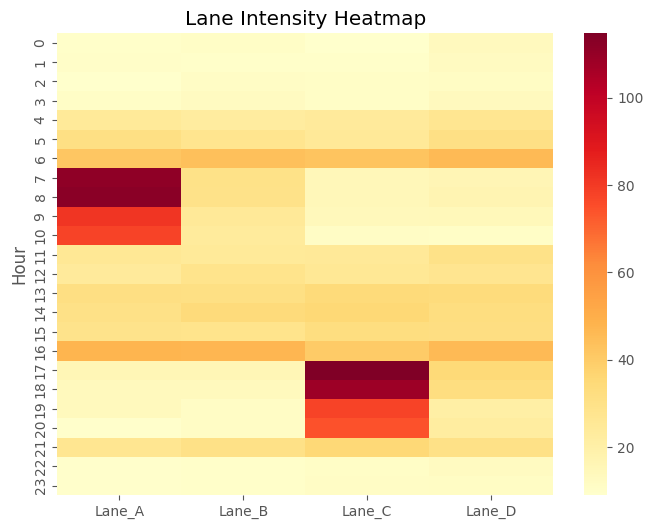

In [33]:
pivot = df.groupby('Hour')[lane_cols].mean()

plt.figure(figsize=(8,6))
sns.heatmap(pivot, cmap='YlOrRd')
plt.title("Lane Intensity Heatmap")
plt.show()


In [36]:
df['Congestion'] = (df['Total'] > df['Total'].mean()).astype(int)

df.sample(10)


,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation,TimeObj,Hour,Minute,DayNum,Lane_A,Lane_B,Lane_C,Lane_D,BusiestLane,Congestion
2571,6:45:00 PM,5,Sunday,78,15,14,28,135,high,1900-01-01 18:45:00,18,45,5,6,5,100,24,Lane_C,1
1419,6:45:00 PM,24,Tuesday,71,17,15,31,134,high,1900-01-01 18:45:00,18,45,24,8,2,88,36,Lane_C,1
1332,9:00:00 PM,23,Monday,73,18,10,35,136,high,1900-01-01 21:00:00,21,0,23,38,34,49,15,Lane_C,1
1603,4:45:00 PM,26,Thursday,122,16,28,6,172,heavy,1900-01-01 16:45:00,16,45,26,38,65,38,31,Lane_B,1
1279,7:45:00 AM,23,Monday,108,40,45,1,194,heavy,1900-01-01 07:45:00,7,45,23,166,24,0,4,Lane_A,1
1048,10:00:00 PM,20,Friday,19,1,0,11,31,low,1900-01-01 22:00:00,22,0,20,3,3,22,3,Lane_C,0
2156,11:00:00 AM,1,Wednesday,32,5,3,21,61,normal,1900-01-01 11:00:00,11,0,1,27,16,14,4,Lane_A,0
1700,5:00:00 PM,27,Friday,53,28,21,1,103,normal,1900-01-01 17:00:00,17,0,27,41,2,40,20,Lane_A,0
2794,2:30:00 AM,8,Wednesday,19,0,1,13,33,normal,1900-01-01 02:30:00,2,30,8,3,7,8,15,Lane_D,0
1494,1:30:00 PM,25,Wednesday,60,25,24,17,126,normal,1900-01-01 13:30:00,13,30,25,28,14,29,55,Lane_D,1
